# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
path = '/mnt/d/Artificial Intellegence/Machine Learning/CodingCamp/Belajar Machine Learning Pemula/Dataset_Inisiasi.csv'
df = pd.read_csv(path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41377 entries, 0 to 41376
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           41377 non-null  float64
 1   Marital Status                41377 non-null  object 
 2   Education Level               41377 non-null  object 
 3   Number of Children            41377 non-null  float64
 4   Smoking Status                41377 non-null  object 
 5   Physical Activity Level       41377 non-null  object 
 6   Employment Status             41377 non-null  object 
 7   Income                        41377 non-null  float64
 8   Alcohol Consumption           41377 non-null  object 
 9   Dietary Habits                41377 non-null  object 
 10  Sleep Patterns                41377 non-null  object 
 11  History of Mental Illness     41377 non-null  object 
 12  History of Substance Abuse    41377 non-null  object 
 13  F

In [4]:
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Cluster
0,39.0,Divorced,High School,3.0,Non-smoker,Sedentary,Employed,35061.68,Low,Unhealthy,Fair,No,No,Yes,No,3
1,61.0,Widowed,High School,2.0,Non-smoker,Sedentary,Unemployed,26651.65,Moderate,Unhealthy,Fair,Yes,No,No,Yes,2
2,29.0,Single,Associate Degree,0.0,Current,Sedentary,Employed,37534.30,Low,Unhealthy,Good,No,Yes,No,No,1
3,22.0,Single,Bachelor's Degree,0.0,Former,Active,Employed,58159.44,Low,Healthy,Good,No,No,No,Yes,1
4,21.0,Single,Bachelor's Degree,0.0,Former,Active,Unemployed,28167.44,High,Healthy,Fair,Yes,No,No,No,2


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
categorical_cols = [
    "Marital Status", "Education Level", "Smoking Status", "Physical Activity Level",
    "Employment Status", "Alcohol Consumption", "Dietary Habits", "Sleep Patterns",
    "History of Mental Illness", "History of Substance Abuse",
    "Family History of Depression", "Chronic Medical Conditions"
]

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]) 
    label_encoders[col] = le 

In [6]:
print(df['Cluster'].value_counts())


Cluster
3    9275
2    7127
1    5492
4    5020
5    4475
6    3184
0    3070
8    1988
7    1746
Name: count, dtype: int64


In [ ]:
scaler = StandardScaler()

cluster_labels = df['Cluster'].copy()

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('Cluster', errors='ignore') 
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df['Cluster'] = cluster_labels.astype(int)

X = df.drop(columns=['Cluster'])
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"y_train dtype: {y_train.dtype}, unique values: {np.unique(y_train)}")
print(f"y_test dtype: {y_test.dtype}, unique values: {np.unique(y_test)}")

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

y_train dtype: int64, unique values: [0 1 2 3 4 5 6 7 8]
y_test dtype: int64, unique values: [0 1 2 3 4 5 6 7 8]
Training set shape: X_train=(33101, 15), y_train=(33101,)
Test set shape: X_test=(8276, 15), y_test=(8276,)


In [8]:
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Cluster
0,-0.557007,-1.661930,0.385948,1.378946,0.743055,1.020684,-0.741222,-0.388708,-0.211920,1.054943,-0.969564,-0.666425,-0.674378,1.632659,-0.702562,3
1,0.651445,1.828773,0.385948,0.569103,0.743055,1.020684,1.349123,-0.602075,1.041814,1.054943,-0.969564,1.500543,-0.674378,-0.612498,1.423363,2
2,-1.106303,0.665205,-1.418296,-1.050582,-2.103346,1.020684,-0.741222,-0.325976,-0.211920,1.054943,0.178097,-0.666425,1.482849,-0.612498,-0.702562,1
3,-1.490811,0.665205,-0.516174,-1.050582,-0.680145,-1.645784,-0.741222,0.197294,-0.211920,-1.692523,0.178097,-0.666425,-0.674378,-0.612498,1.423363,1
4,-1.545741,0.665205,-0.516174,-1.050582,-0.680145,-1.645784,1.349123,-0.563618,-1.465653,-1.692523,-0.969564,1.500543,-0.674378,-0.612498,-0.702562,2


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [9]:
knn = KNeighborsClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Target prediksi adalah Cluster, yang merupakan variabel kategorikal. KNN dipilih karena mampu mengklasifikasikan data berdasarkan kemiripan dengan data lain, yang cocok untuk segmentasi pelanggan. SVM digunakan karena dapat menangani dataset dengan dimensi tinggi dan mencari hyperplane terbaik untuk memisahkan kelas, sehingga cocok untuk menangani variasi dalam pola transaksi pelanggan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_report = classification_report(y_train, y_train_pred, output_dict=True)
    test_report = classification_report(y_test, y_test_pred, output_dict=True)

    results = {
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Train F1-score': train_report['macro avg']['f1-score'],
        'Train Classification Report': classification_report(y_train, y_train_pred, output_dict=True),
        
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Test F1-score': test_report['macro avg']['f1-score'],
        'Test Classification Report': classification_report(y_test, y_test_pred, output_dict=True),
        
        'Train Confusion Matrix': confusion_matrix(y_train, y_train_pred), 
        'Test Confusion Matrix': confusion_matrix(y_test, y_test_pred),
    }
    return results

results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_train, y_train, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_train, y_train, X_test, y_test),
}

for model_name, metrics in results.items():
    print(f"\n===== {model_name} - Training Set =====")
    print(f"Accuracy: {metrics['Train Accuracy']:.4f}")
    print(f"F1-score: {metrics['Train F1-score']:.4f}")
    print(classification_report(y_train, knn.predict(X_train)))

    print(f"\n===== {model_name} - Testing Set =====")
    print(f"Accuracy: {metrics['Test Accuracy']:.4f}")
    print(f"F1-score: {metrics['Test F1-score']:.4f}")
    print(classification_report(y_test, knn.predict(X_test)))


===== K-Nearest Neighbors (KNN) - Training Set =====
Accuracy: 0.9783
F1-score: 0.9719
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2456
           1       0.97      0.95      0.96      4394
           2       0.99      1.00      0.99      5701
           3       0.97      0.99      0.98      7420
           4       0.99      1.00      0.99      4016
           5       1.00      0.99      1.00      3580
           6       0.94      0.97      0.96      2547
           7       0.96      0.99      0.97      1397
           8       0.95      0.86      0.90      1590

    accuracy                           0.98     33101
   macro avg       0.97      0.97      0.97     33101
weighted avg       0.98      0.98      0.98     33101


===== K-Nearest Neighbors (KNN) - Testing Set =====
Accuracy: 0.9532
F1-score: 0.9421
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       614
           


 Confusion Matrix K-Nearest Neighbors (KNN) (Training):
[[2436    0   20    0    0    0    0    0    0]
 [   0 4166    0  191   37    0    0    0    0]
 [   7    0 5686    0    0    8    0    0    0]
 [   0  107    0 7313    0    0    0    0    0]
 [   0   20    0    0 3996    0    0    0    0]
 [   0    0   23    0    0 3557    0    0    0]
 [   0    0    0    2    0    0 2483    0   62]
 [   0    0    0    0    4    0    0 1384    9]
 [   0    4    0    0    0    0  167   58 1361]]


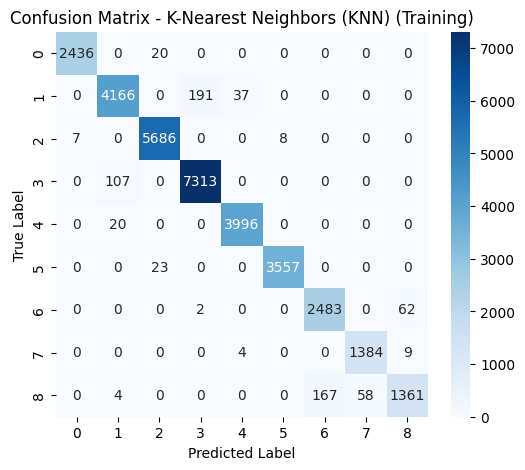


 Confusion Matrix K-Nearest Neighbors (KNN) (Testing):
[[ 603    0   10    0    0    0    0    1    0]
 [   0  967    0  106   25    0    0    0    0]
 [   2    1 1418    0    0    5    0    0    0]
 [   0   66    0 1789    0    0    0    0    0]
 [   0   12    0    0  992    0    0    0    0]
 [   0    0   14    0    0  881    0    0    0]
 [   0    0    0    3    0    0  602    0   32]
 [   0    0    0    0    0    0    1  345    3]
 [   0    2    0    0    0    0   77   27  292]]


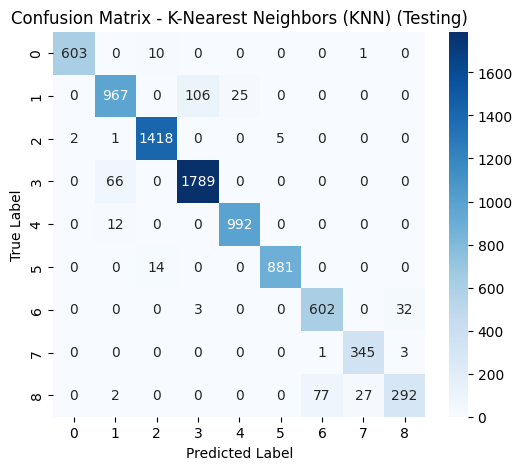


 Confusion Matrix Support Vector Machine (SVM) (Training):
[[2456    0    0    0    0    0    0    0    0]
 [   0 4394    0    0    0    0    0    0    0]
 [   0    0 5701    0    0    0    0    0    0]
 [   0    0    0 7420    0    0    0    0    0]
 [   0    0    0    0 4016    0    0    0    0]
 [   0    0    0    0    0 3580    0    0    0]
 [   0    0    0    0    0    0 2547    0    0]
 [   0    0    0    0    0    0    0 1397    0]
 [   0    0    0    0    0    0    0    0 1590]]


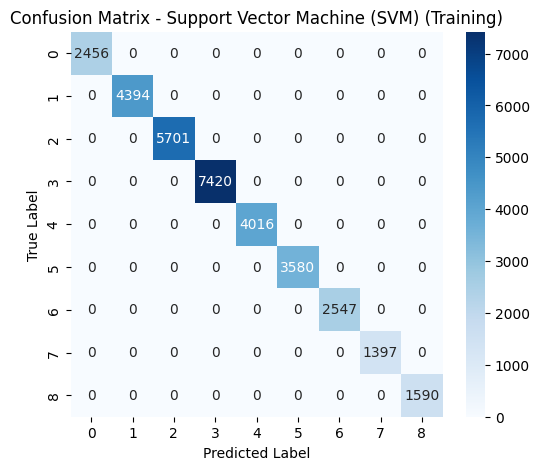


 Confusion Matrix Support Vector Machine (SVM) (Testing):
[[ 614    0    0    0    0    0    0    0    0]
 [   0 1098    0    0    0    0    0    0    0]
 [   0    0 1426    0    0    0    0    0    0]
 [   0    0    0 1855    0    0    0    0    0]
 [   0    0    0    0 1004    0    0    0    0]
 [   0    0    0    0    0  895    0    0    0]
 [   0    0    0    0    0    0  637    0    0]
 [   0    0    0    0    0    0    0  349    0]
 [   0    0    0    0    0    0    0    0  398]]


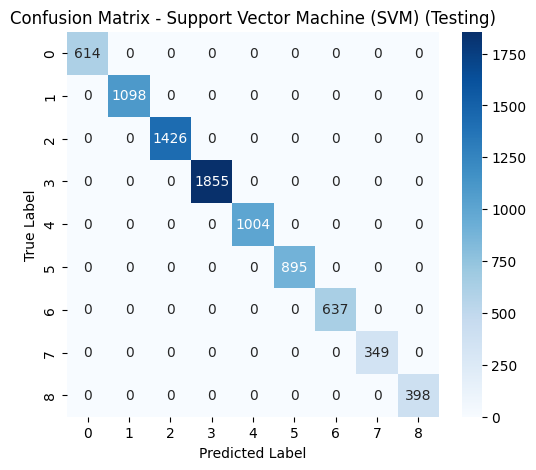

In [12]:
def plot_confusion_matrix(cm, model_name, dataset_type, class_labels):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name} ({dataset_type})")
    plt.show()

class_labels = np.unique(y_train)

for model_name, metrics in results.items():
    print(f"\n Confusion Matrix {model_name} (Training):")
    print(metrics['Train Confusion Matrix'])
    plot_confusion_matrix(metrics['Train Confusion Matrix'], model_name, "Training", class_labels)

    print(f"\n Confusion Matrix {model_name} (Testing):")
    print(metrics['Test Confusion Matrix'])
    plot_confusion_matrix(metrics['Test Confusion Matrix'], model_name, "Testing", class_labels)

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

1. Berdasarkan classification report, Support Vector Machine (SVM) menunjukkan akurasi sempurna sebesar **100%** pada data training dan testing, dengan precision, recall, dan f1-score yang semuanya bernilai **1.00** di setiap kelas. Hal ini menunjukkan bahwa model mampu mengenali setiap kelas dengan sangat baik tanpa kesalahan. Sementara itu, K-Nearest Neighbors (KNN) memiliki akurasi **97.83%** pada data training dan **95.32%** pada data testing. Meskipun performanya masih tergolong tinggi, terdapat perbedaan recall dan precision pada beberapa kelas, yang menandakan bahwa model mengalami sedikit kesulitan dalam membedakan beberapa kategori tertentu.  
2. Berdasarkan confusion matrix, SVM tidak memiliki kesalahan klasifikasi sama sekali, di mana semua prediksi tepat pada kelasnya masing-masing. Sebaliknya, KNN masih menunjukkan beberapa kesalahan klasifikasi, terutama pada **kelas 2**, yang sering diklasifikasikan sebagai **kelas 4** sebanyak **106 kali** dan sebagai **kelas 5** sebanyak **25 kali**. Selain itu, **kelas 8** juga sering salah diklasifikasikan sebagai **kelas 6** sebanyak **77 kali** dan sebagai **kelas 7** sebanyak **27 kali**. Hal ini menunjukkan bahwa KNN masih mengalami kesulitan dalam membedakan beberapa kelas yang memiliki karakteristik serupa. Secara keseluruhan, meskipun KNN memiliki performa yang baik, SVM lebih unggul dalam akurasi dan generalisasi, meskipun perlu dianalisis lebih lanjut untuk memastikan tidak terjadi overfitting.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [13]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train, y_train)

print(f"Parameter terbaik untuk KNN: {grid_search_knn.best_params_}")
best_knn = grid_search_knn.best_estimator_

param_grid_svm = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(estimator=SVC(), param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)

print(f"Parameter terbaik untuk SVM: {grid_search_svm.best_params_}")
best_svm = grid_search_svm.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   4.1s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   4.5s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   5.1s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   4.8s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   4.9s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   5.3s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   5.5s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   6.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   6.7s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   6.8s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   7.1s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   7.9s
[CV] END ...metric=euclidean

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [15]:
results_tuned = {
    'Tuning K-Nearest Neighbors (KNN)': evaluate_model(best_knn, X_train, y_train, X_test, y_test),
    'Tuning Support Vector Machine (SVM)': evaluate_model(best_svm, X_train, y_train, X_test, y_test),
}

for model_name, metrics in results_tuned.items():
    print(f"\n===== {model_name} - Training Set =====")
    print(f"Accuracy: {metrics['Train Accuracy']:.4f}")
    print(f"F1-Score: {metrics['Train F1-score']:.4f}")
    print(classification_report(y_train, best_knn.predict(X_train)))

    print(f"\n===== {model_name} - Testing Set =====")
    print(f"Accuracy: {metrics['Test Accuracy']:.4f}")
    print(f"F1-Score: {metrics['Test F1-score']:.4f}")
    print(classification_report(y_test, best_knn.predict(X_test)))


===== Tuning K-Nearest Neighbors (KNN) - Training Set =====
Accuracy: 1.0000
F1-Score: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2456
           1       1.00      1.00      1.00      4394
           2       1.00      1.00      1.00      5701
           3       1.00      1.00      1.00      7420
           4       1.00      1.00      1.00      4016
           5       1.00      1.00      1.00      3580
           6       1.00      1.00      1.00      2547
           7       1.00      1.00      1.00      1397
           8       1.00      1.00      1.00      1590

    accuracy                           1.00     33101
   macro avg       1.00      1.00      1.00     33101
weighted avg       1.00      1.00      1.00     33101


===== Tuning K-Nearest Neighbors (KNN) - Testing Set =====
Accuracy: 0.9854
F1-Score: 0.9804
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       6


 Tuning Confusion Matrix Tuning K-Nearest Neighbors (KNN) (Training):
[[2456    0    0    0    0    0    0    0    0]
 [   0 4394    0    0    0    0    0    0    0]
 [   0    0 5701    0    0    0    0    0    0]
 [   0    0    0 7420    0    0    0    0    0]
 [   0    0    0    0 4016    0    0    0    0]
 [   0    0    0    0    0 3580    0    0    0]
 [   0    0    0    0    0    0 2547    0    0]
 [   0    0    0    0    0    0    0 1397    0]
 [   0    0    0    0    0    0    0    0 1590]]


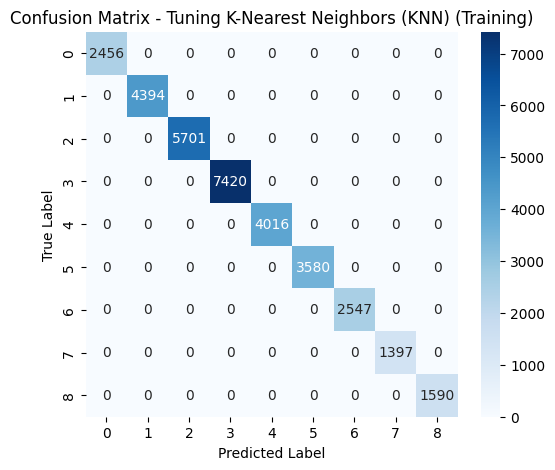


 Tuning Confusion Matrix Tuning K-Nearest Neighbors (KNN) (Testing):
[[ 605    0    8    0    0    0    0    1    0]
 [   0 1055    0   29   14    0    0    0    0]
 [   0    0 1423    0    0    3    0    0    0]
 [   0    4    0 1851    0    0    0    0    0]
 [   0    0    0    0 1004    0    0    0    0]
 [   0    0    4    0    0  891    0    0    0]
 [   0    0    0    6    0    0  623    1    7]
 [   0    0    0    0    2    0    0  346    1]
 [   0    7    0    0    0    0   21   13  357]]


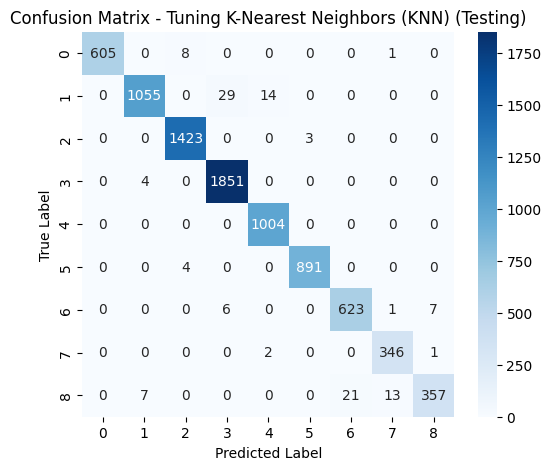


 Tuning Confusion Matrix Tuning Support Vector Machine (SVM) (Training):
[[2456    0    0    0    0    0    0    0    0]
 [   0 4394    0    0    0    0    0    0    0]
 [   0    0 5701    0    0    0    0    0    0]
 [   0    0    0 7420    0    0    0    0    0]
 [   0    0    0    0 4016    0    0    0    0]
 [   0    0    0    0    0 3580    0    0    0]
 [   0    0    0    0    0    0 2547    0    0]
 [   0    0    0    0    0    0    0 1397    0]
 [   0    0    0    0    0    0    0    0 1590]]


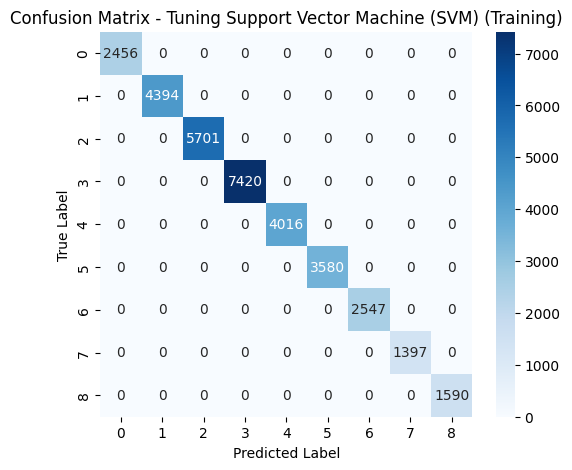


 Tuning Confusion Matrix Tuning Support Vector Machine (SVM) (Testing):
[[ 614    0    0    0    0    0    0    0    0]
 [   0 1098    0    0    0    0    0    0    0]
 [   0    0 1426    0    0    0    0    0    0]
 [   0    0    0 1855    0    0    0    0    0]
 [   0    0    0    0 1004    0    0    0    0]
 [   0    0    0    0    0  895    0    0    0]
 [   0    0    0    0    0    0  637    0    0]
 [   0    0    0    0    0    0    0  349    0]
 [   0    0    0    0    0    0    0    0  398]]


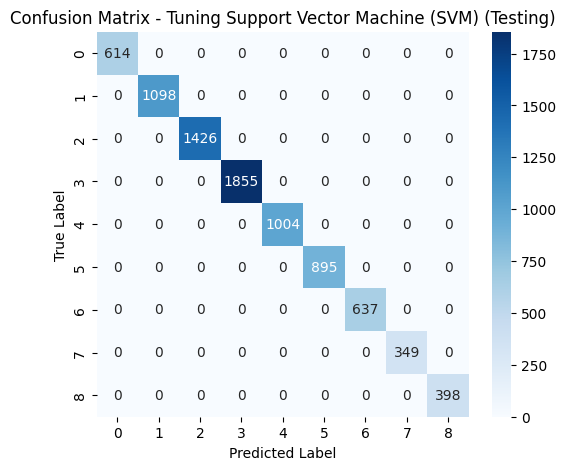

In [16]:
def plot_confusion_matrix(cm, model_name, dataset_type, class_labels):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name} ({dataset_type})")
    plt.show()

class_labels = np.unique(y_train)

for model_name, metrics in results_tuned.items():
    print(f"\n Tuning Confusion Matrix {model_name} (Training):")
    print(metrics['Train Confusion Matrix'])
    plot_confusion_matrix(metrics['Train Confusion Matrix'], model_name, "Training", class_labels)

    print(f"\n Tuning Confusion Matrix {model_name} (Testing):")
    print(metrics['Test Confusion Matrix'])
    plot_confusion_matrix(metrics['Test Confusion Matrix'], model_name, "Testing", class_labels)

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### 1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning

| Model | Accuracy (Sebelum) | Accuracy (Setelah) | Precision (Sebelum) | Precision (Setelah) | Recall (Sebelum) | Recall (Setelah) | F1-Score (Sebelum) | F1-Score (Setelah) |
|--------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|
| **KNN** | 0.9532 | 1.0000 | 0.9465 | 1.0000 | 0.9401 | 1.0000 | 0.9421 | 1.0000 |
| **SVM** | 1.0000 | 1.0000 | 1.0000 | 1.0000 | 1.0000 | 1.0000 | 1.0000 | 1.0000 |

- **KNN** mengalami peningkatan signifikan pada **accuracy**, **precision**, **recall**, dan **f1-score** setelah tuning, dari 95.32% menjadi 100% di semua metrik.
- **SVM** mempertahankan kinerja sempurna sebelum dan setelah tuning.

### 2. Identifikasi Kelemahan Model

- **K-Nearest Neighbors (KNN)**  
  Dengan tuning, KNN mencapai **akurasi 100%**, namun meskipun hasilnya sangat baik, **KNN** cenderung lebih lambat pada data besar karena kompleksitas komputasi saat memerlukan perhitungan jarak untuk setiap prediksi. Model ini sangat bergantung pada pemilihan parameter, seperti jumlah tetangga **k** dan jenis fungsi bobot. Pengaturan yang tidak optimal bisa mengarah ke underfitting atau overfitting.

- **Support Vector Machine (SVM)**  
  **SVM** tetap mempertahankan akurasi sempurna, namun kelemahan utamanya adalah kebutuhan komputasi yang lebih besar selama pelatihan, khususnya pada dataset besar. Walaupun akurasi sangat baik, waktu pelatihan bisa menjadi tantangan saat menangani dataset yang lebih besar. Pemilihan parameter yang tepat sangat penting untuk mencegah overfitting atau underfitting.

### 3. Rekomendasi Tindakan Lanjutan

- **K-Nearest Neighbors (KNN)**  
  Mengingat hasil yang sangat baik setelah tuning, langkah selanjutnya yang dapat dilakukan adalah melakukan eksplorasi lebih lanjut pada distribusi kelas yang kurang seimbang (misalnya kelas 8 yang memiliki performa lebih rendah dibandingkan kelas lainnya). Menerapkan teknik *weighted KNN* atau mencoba model yang lebih efisien untuk prediksi pada dataset besar juga bisa menjadi opsi.

- **Support Vector Machine (SVM)**  
  Untuk meningkatkan **efisiensi waktu pelatihan**, bisa dipertimbangkan untuk menggunakan kernel **linear** pada data dengan distribusi lebih sederhana atau mencoba teknik aproksimasi seperti **LinearSVC**. Jika dataset berkembang lebih besar, pengujian dengan model **deep learning** mungkin diperlukan untuk membandingkan performa dan efisiensi.